In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
from math import pi

In [2]:
from windrose import WindroseAxes

# Create wind speed and direction variables

In [3]:
N = 500
ws = np.random.random(N)*6
wd = np.random.random(N)*360

In [4]:
df = pd.DataFrame({"speed": ws, "direction": wd})
df

,direction,speed
0,215.262198,3.097674
1,319.188158,4.853040
2,275.980176,5.391387
3,91.111268,3.708316
4,266.453726,2.298292
5,155.509724,4.989684
6,333.902822,4.456108
7,177.208871,4.568336
8,306.216666,2.069329
9,105.776877,3.106843


# A basic scatter plot with transparency (alpha)

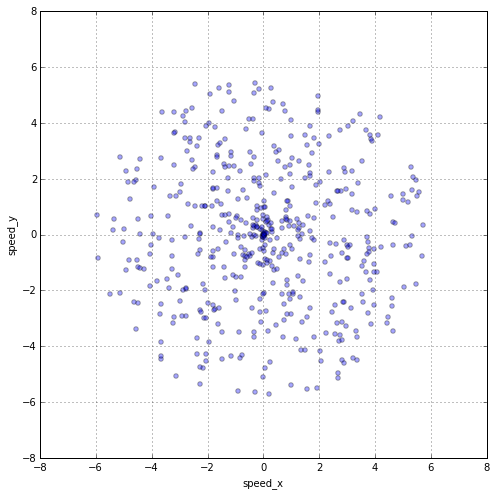

In [5]:
df['speed_x'] = df['speed'] * np.sin(df['direction'] * pi / 180.0)
df['speed_y'] = df['speed'] * np.cos(df['direction'] * pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect('equal')
_ = df.plot(kind='scatter', x='speed_x', y='speed_y', alpha=0.35, ax=ax)

# windrose like a stacked histogram with normed (displayed in percent) results

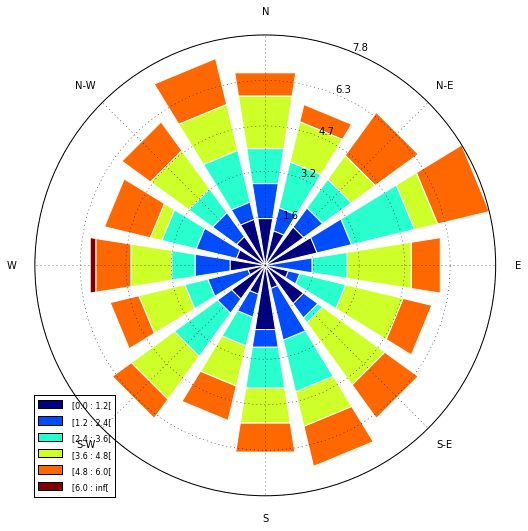

In [6]:
ax = WindroseAxes.from_ax()
ax.bar(df.direction, df.speed, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

# Another stacked histogram representation, not normed, with bins limits

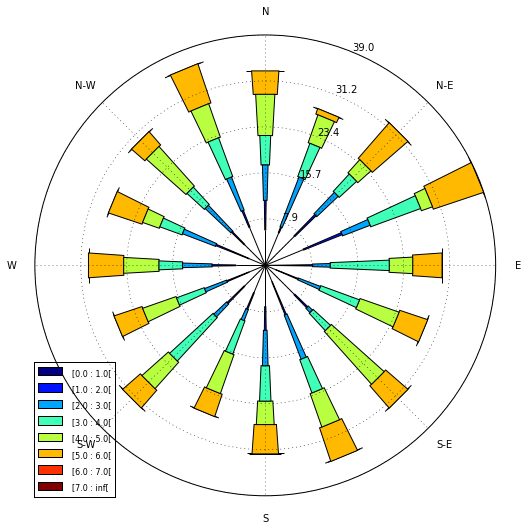

In [7]:
ax = WindroseAxes.from_ax()
ax.box(df.direction, df.speed, bins=np.arange(0, 8, 1))
ax.set_legend()

# A windrose in filled representation, with a controled colormap

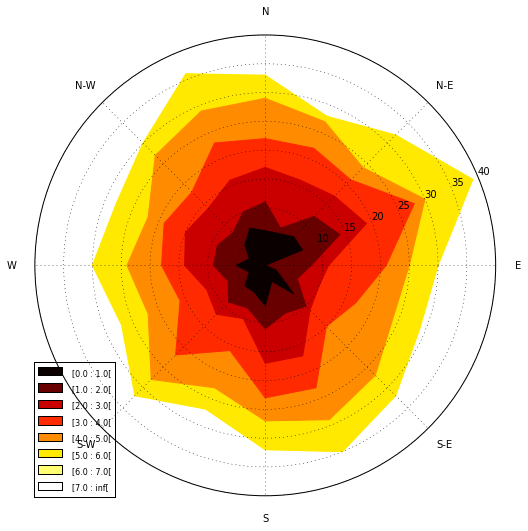

In [8]:
ax = WindroseAxes.from_ax()
ax.contourf(df.direction, df.speed, bins=np.arange(0, 8, 1), cmap=cm.hot)
ax.set_legend()

# Same as above, but with contours over each filled region...

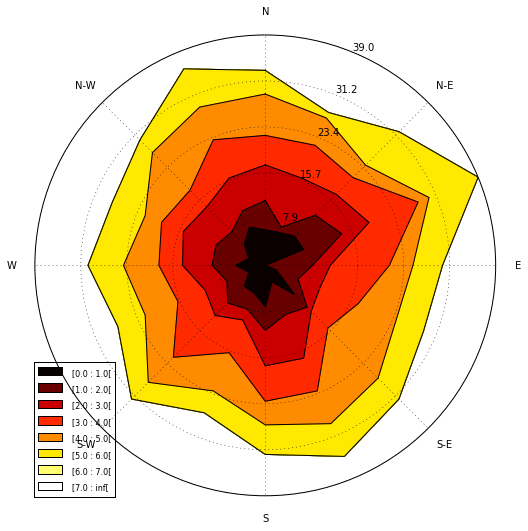

In [9]:
ax = WindroseAxes.from_ax()
ax.contourf(df.direction, df.speed, bins=np.arange(0, 8, 1), cmap=cm.hot)
ax.contour(df.direction, df.speed, bins=np.arange(0, 8, 1), colors='black')
ax.set_legend()

# ...or without filled regions

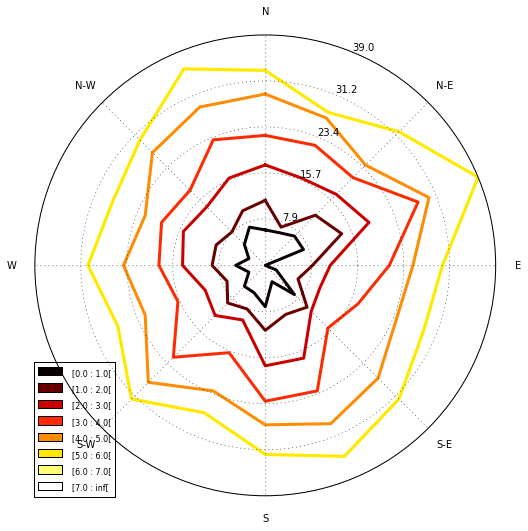

In [10]:
ax = WindroseAxes.from_ax()
ax.contour(df.direction, df.speed, bins=np.arange(0, 8, 1), cmap=cm.hot, lw=3)
ax.set_legend()